In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import matplotlib.pyplot as plt
import kaepora as kpora
import kaepora_plot as kplot
import numpy as np
import spectral_analysis as sa
import sqlite3 as sq3

In [3]:
# v_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 2 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11",
#            "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 2 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.3)) and v_at_max > -11"]


In [4]:
# composites, sn_arrays, boot_sn_arrays = kpora.make_composite(v_query, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)


In [83]:
with open('../data/info_files/Foundation_MLCS.FITRES.TEXT') as f:
    lines = f.readlines()
    names = []
    for i, line in enumerate(lines):
        l = line.split()
        if i > 10:
            if l[1].startswith('SN'):
                names.append(l[1].lower()[2:])
            else:
                names.append(l[1].lower())
                
print names

['psnj08593491', 'asassn15fs', 'asassn15sv', 'asassn15go', 'asassn15hg', 'ps15adh', 'asassn15hy', 'ps15ahs', 'ps15aii', 'asassn15il', 'asassn15jl', 'psnj13003230', 'psnj16283836', 'psnj16025128', 'asassn15jt', 'psnj12040516', 'asassn15kx', 'asassn15la', 'masterj22223', 'ps15atx', 'asassn15lg', 'ps15asb', 'asassn15lu', 'asassn15mf', 'ps15bbn', 'ps15bdr', 'asassn15mg', 'asassn15mi', 'psnj20435314', 'ps15bif', 'ps15bjg', 'asassn15nr', 'asassn15nq', 'asassn15np', 'asassn15oh', 'ps15bsh', 'ps15bsq', 'asassn15od', 'ps15bst', 'ps15brr', 'psnj23102264', 'ps15bwh', 'asassn15pm', 'asassn15pn', 'asassn15pr', 'ps15bzz', 'psnj02524671', 'psnj23523718', 'asassn15py', 'ps15cfn', 'ps15cge', 'ps15cku', 'asassn15sb', 'ps15cms', 'asassn15sf', 'ps15coh', 'asassn15ss', 'psnj01072038', 'css15112004', 'ps15cwx', 'psnj03094251', 'asassn15tg', 'ps15cze', 'asassn15ti', 'asassn15tz', 'psnj01534240', 'asassn15uu', 'asassn15uw', 'ps15dpl', 'ps16em', 'ps16fa', 'asassn16ad', 'ps16el', 'ps16ez', 'ps16n', 'asassn16aj'

In [86]:
con = sq3.connect('../data/kaepora_v1.1.db')
cur = con.cursor()

spec_table = cur.execute("SELECT SN, HOST_LOGMASS from EVENTS where HOST_LOGMASS")
for tup in cur.fetchall():
    if tup[0] in names and tup[1] < 9 and tup[1] > 5:
        print tup[0], tup[1]

asassn16oz 7.507
ps15bbn 8.23
ps16dnp 8.353
ps15coh 8.63
gaia16bba 8.651
atlas16dqf 6.768
asassn16dn 7.285
ps16cvc 8.919
atlas16cxr 8.271
ps16ccn 8.169
ps17akj 8.978
asassn16em 8.998
asassn15ti 8.722


In [5]:
# kpora.set_min_num_spec(composites, 5)
# kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

In [8]:
query_strings_highv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11"]
max_phase = 50.
p1 = -10.
k = 3.
p2 = p1+k
while p1 < max_phase:
    query_strings_highv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_highv:
    print "'" + q + "'" + ','
# print query_strings_highv

'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON

In [9]:
query_strings_lowv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11"]
max_phase = 50.
p1 = -10.
k = 3.
p2 = p1+k
while p1 < max_phase:
    query_strings_lowv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_lowv:
    print "'" + q + "'" + ','

'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.000000 and phase

In [19]:
query_strings_highv = [
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.000000 and phase < 2.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 2.000000 and phase < 5.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 5.000000 and phase < 8.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 8.000000 and phase < 11.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 11.000000 and phase < 14.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 14.000000 and phase < 17.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 17.000000 and phase < 20.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 20.000000 and phase < 23.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23.000000 and phase < 26.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 26.000000 and phase < 29.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 32.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 32.000000 and phase < 35.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 35.000000 and phase < 38.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 38.000000 and phase < 41.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 41.000000 and phase < 44.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 44.000000 and phase < 47.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 47.000000 and phase < 50.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11']

query_strings_lowv = [
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.000000 and phase < 2.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 2.000000 and phase < 5.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 5.000000 and phase < 8.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 8.000000 and phase < 11.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 11.000000 and phase < 14.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 14.000000 and phase < 17.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 17.000000 and phase < 20.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 20.000000 and phase < 23.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23.000000 and phase < 26.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 26.000000 and phase < 29.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 32.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 32.000000 and phase < 35.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 35.000000 and phase < 38.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 38.000000 and phase < 41.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 41.000000 and phase < 44.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 44.000000 and phase < 47.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11',
'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 47.000000 and phase < 50.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11']


In [20]:
composites_lowv, sn_arrays_lowv, boot_sn_arrays_lowv = kpora.make_composite(query_strings_lowv, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11
33 Total Spectra found
1 flagged spectra removed 32 spectra left
0 spectra of peculiar Ias removed 32 spectra left
32 spectra of SNe that have host reddening corrections
Arrays cleaned
32 spectra may have telluric contamination
10 total SNe
removed spectra of SNe with A_V > 2.0
Using 32 spectra of 10 SNe
Gini balancing...
Balanced after 14 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11
40 Total Spectra found
2 flagged spectra removed 38 spectra left
0 spectra of peculiar Ias removed 38 spectra left
30 spectra of SNe that have host reddening corrections
Arrays cleaned
30 spectr

Gini balancing...
Balanced after 10 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 26.000000 and phase < 29.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11
30 Total Spectra found
0 flagged spectra removed 30 spectra left
0 spectra of peculiar Ias removed 30 spectra left
28 spectra of SNe that have host reddening corrections
Arrays cleaned
28 spectra may have telluric contamination
17 total SNe
removed spectra of SNe with A_V > 2.0
Using 28 spectra of 17 SNe
Gini balancing...
Balanced after 10 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 32.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max > -11
31 Total Spectra found
0 flagged spectra removed 31 spectra left
0 spectra of peculiar Ias removed 31 spectra left
30 sp

In [21]:
composites_highv, sn_arrays_highv, boot_sn_arrays_highv = kpora.make_composite(query_strings_highv, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11
38 Total Spectra found
0 flagged spectra removed 38 spectra left
0 spectra of peculiar Ias removed 38 spectra left
38 spectra of SNe that have host reddening corrections
Arrays cleaned
38 spectra may have telluric contamination
15 total SNe
removed spectra of SNe with A_V > 2.0
Using 36 spectra of 14 SNe
Gini balancing...
Balanced after 8 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11
87 Total Spectra found
1 flagged spectra removed 86 spectra left
0 spectra of peculiar Ias removed 86 spectra left
78 spectra of SNe that have host reddening correctio

40 total SNe
removed spectra of SNe with A_V > 2.0
Using 46 spectra of 36 SNe
Gini balancing...
Balanced after 12 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 26.000000 and phase < 29.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11
50 Total Spectra found
2 flagged spectra removed 48 spectra left
0 spectra of peculiar Ias removed 48 spectra left
46 spectra of SNe that have host reddening corrections
Arrays cleaned
46 spectra may have telluric contamination
36 total SNe
removed spectra of SNe with A_V > 2.0
Using 41 spectra of 35 SNe
Gini balancing...
Balanced after 15 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 32.000000 and ((dm15_source >= .9 and dm15_source < 1.6) or (dm15_from_fits >= .9 and dm15_from_fits < 1.6)) and v_at_max between -30 and -11
49 Total Spect

In [22]:
dm15s = []
vels = []
for comp in composites_lowv:
    print 'Num spec: ', comp.num_sne
    print 'Phase: ', np.average(comp.phase_array[comp.x1:comp.x2])
    print 'dm15: ', np.average(comp.dm15_array[comp.x1:comp.x2])
    print 'Vel: ', np.average(comp.vel[comp.x1:comp.x2])
    print 
    dm15s.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
    vels.append(np.average(comp.vel[comp.x1:comp.x2]))
print np.average(dm15s)
print np.average(vels)

Num spec:  10
Phase:  -11.173752855619133
dm15:  1.0745599188617874
Vel:  -10.456897550133007

Num spec:  13
Phase:  -8.077982717882708
dm15:  1.122777078091434
Vel:  -10.429980702005158

Num spec:  25
Phase:  -5.894032201769627
dm15:  1.1476273731676803
Vel:  -10.56011343345983

Num spec:  32
Phase:  -2.029102925795631
dm15:  1.1195385143275212
Vel:  -10.490539985390777

Num spec:  38
Phase:  0.5133364995851281
dm15:  1.0695241596978406
Vel:  -10.486435916021836

Num spec:  39
Phase:  3.408378017953106
dm15:  1.1250934745882657
Vel:  -10.48959606385928

Num spec:  35
Phase:  6.631530012574832
dm15:  1.0648055146653386
Vel:  -10.449717090192038

Num spec:  29
Phase:  9.272544884398341
dm15:  1.0981136638450444
Vel:  -10.489225364646796

Num spec:  24
Phase:  12.213980501973568
dm15:  1.078817698120403
Vel:  -10.565123316857564

Num spec:  25
Phase:  15.258580531460716
dm15:  1.1404960360670142
Vel:  -10.49082009524554

Num spec:  19
Phase:  18.325794921400238
dm15:  1.042538715370607
V

In [23]:
dm15s = []
vels = []
for comp in composites_highv:
    print 'Num spec: ', comp.num_sne
    print 'Phase: ', np.average(comp.phase_array[comp.x1:comp.x2])
    print 'dm15: ', np.average(comp.dm15_array[comp.x1:comp.x2])
    print 'Vel: ', np.average(comp.vel[comp.x1:comp.x2])
    print 
    dm15s.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
    vels.append(np.average(comp.vel[comp.x1:comp.x2]))
print np.average(dm15s)
print np.average(vels)

Num spec:  14
Phase:  -11.669336870875066
dm15:  1.0799432281722046
Vel:  -12.54617962790668

Num spec:  32
Phase:  -8.40080450883464
dm15:  1.1259940952961949
Vel:  -11.977368950921521

Num spec:  39
Phase:  -5.189758316009136
dm15:  1.1724769831932795
Vel:  -12.481101074825904

Num spec:  46
Phase:  -2.4758770246122372
dm15:  1.2303917291693165
Vel:  -12.384647400020281

Num spec:  46
Phase:  0.6326249285239981
dm15:  1.256765052620176
Vel:  -12.058608803492598

Num spec:  47
Phase:  3.4567366533278534
dm15:  1.1706592431034162
Vel:  -12.30057313162898

Num spec:  51
Phase:  6.685771784439559
dm15:  1.2246982687436838
Vel:  -12.7419456852188

Num spec:  56
Phase:  9.486216965770645
dm15:  1.2112016687485432
Vel:  -12.531836065582224

Num spec:  51
Phase:  12.46286627069381
dm15:  1.1019184232948052
Vel:  -12.273690252160312

Num spec:  36
Phase:  15.265135680107054
dm15:  1.202024267626352
Vel:  -12.667940443256729

Num spec:  41
Phase:  18.563735607145723
dm15:  1.132594153359475
Ve

Phase:  -11.088276422811786
dm15:  1.0765115596549153
Redshift:  0.007158215467975978
HR:  -0.03281978220928686
Phase:  -11.483907173002414
dm15:  1.094503646387199
Redshift:  0.009174945441070932
HR:  nan


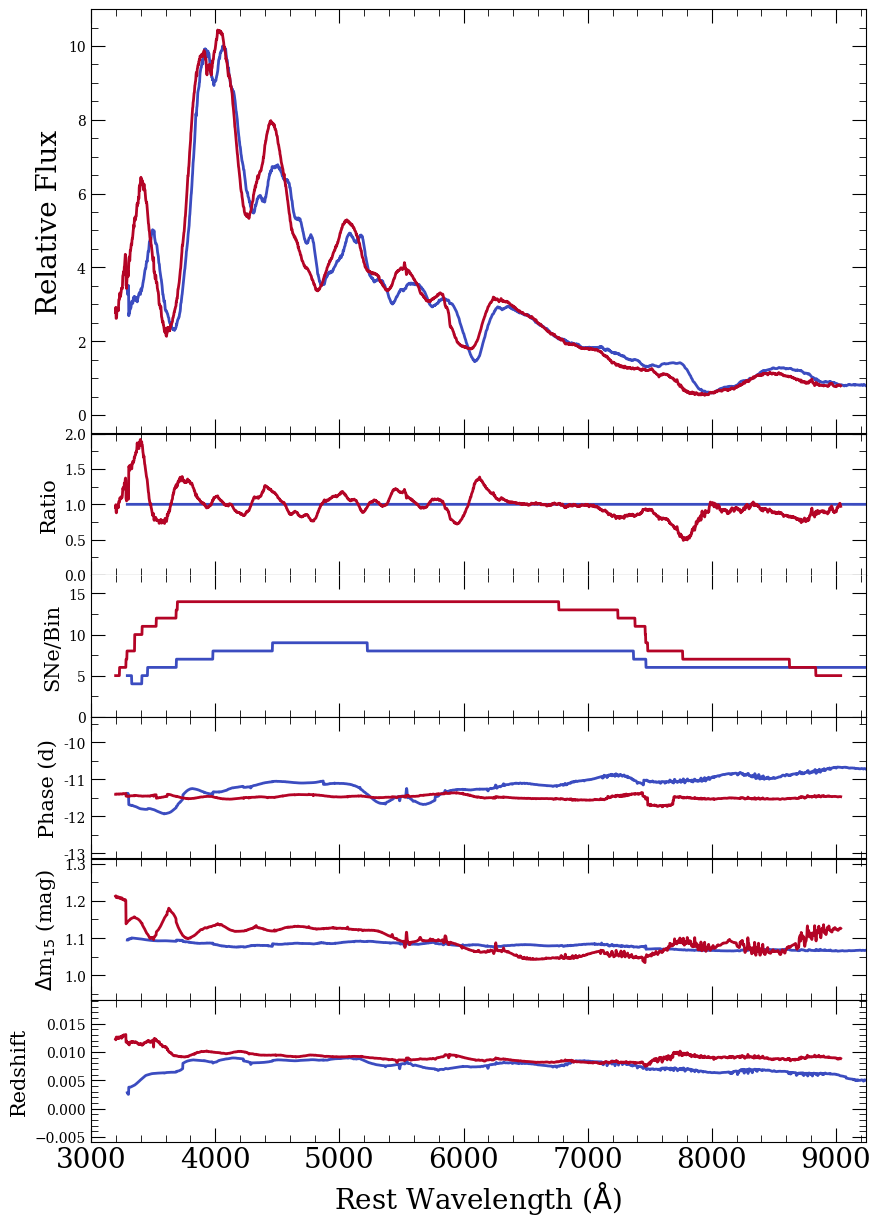

Phase:  -8.10072992635727
dm15:  1.1443793115223397
Redshift:  0.0072453982353167055
HR:  nan
Phase:  -8.318259617914938
dm15:  1.1369961128775703
Redshift:  0.012357260615789407
HR:  -0.07424712914485317


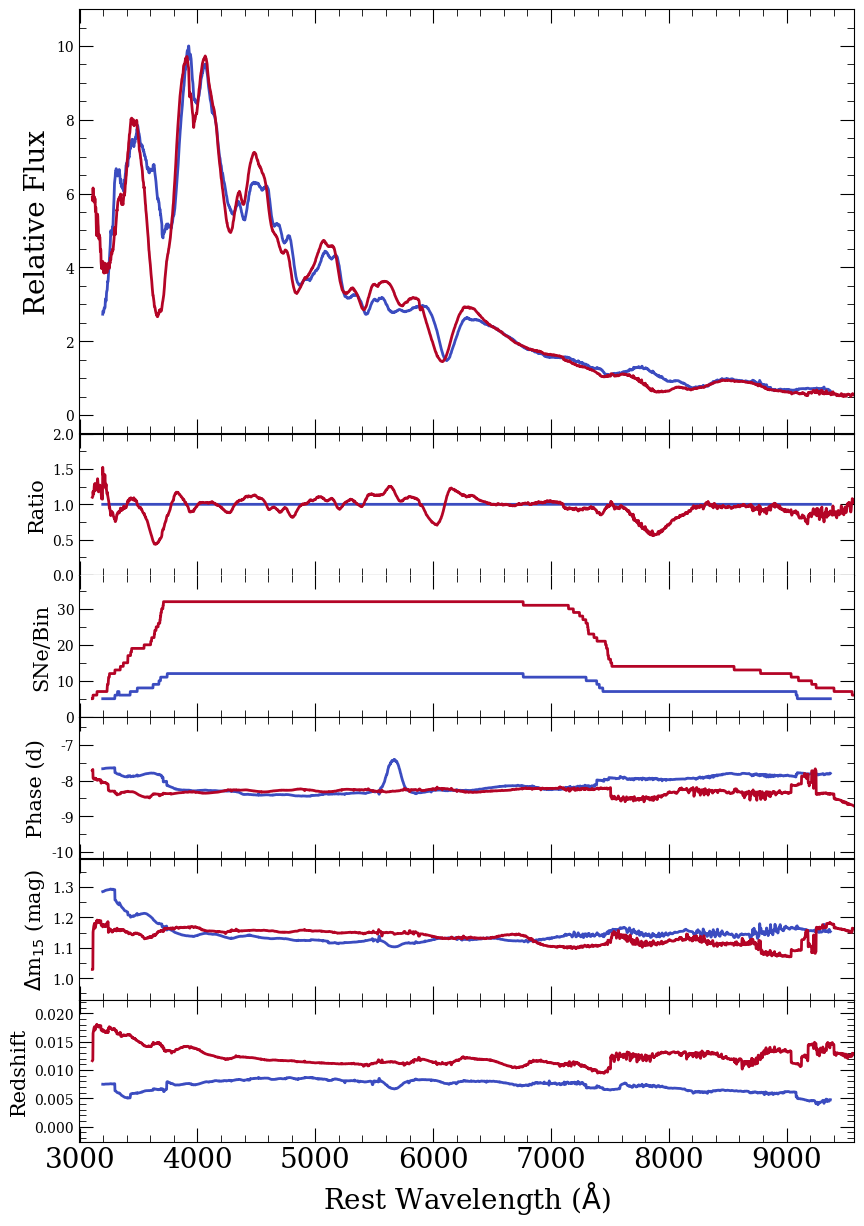

Phase:  -5.8340946113151
dm15:  1.1521494133092751
Redshift:  0.01344408365138015
HR:  nan
Phase:  -5.17445166381663
dm15:  1.119605335271265
Redshift:  0.013351242564552631
HR:  nan


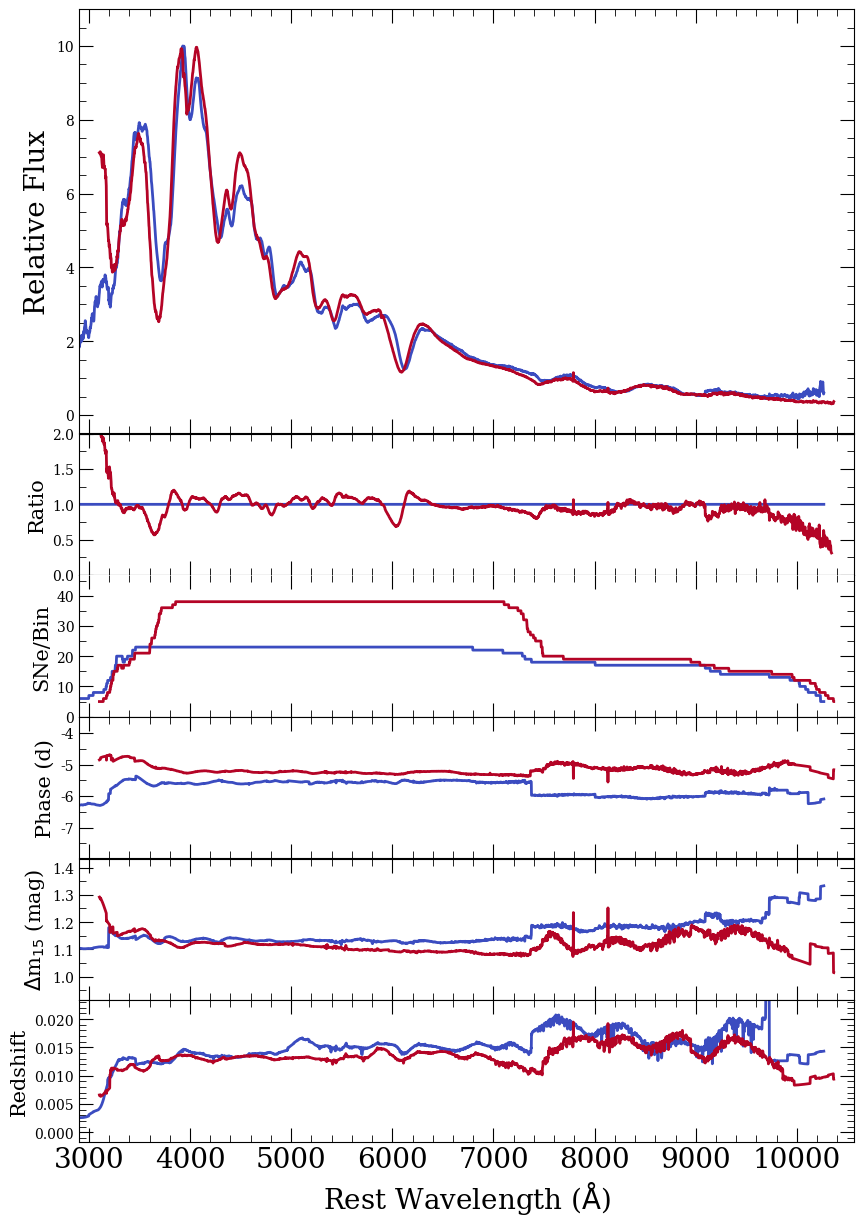

Phase:  -2.0362343039661277
dm15:  1.122534475900052
Redshift:  0.008412402712052007
HR:  nan
Phase:  -2.6968855105161884
dm15:  1.1958572523026247
Redshift:  0.015507309737204888
HR:  -0.048384278766548064


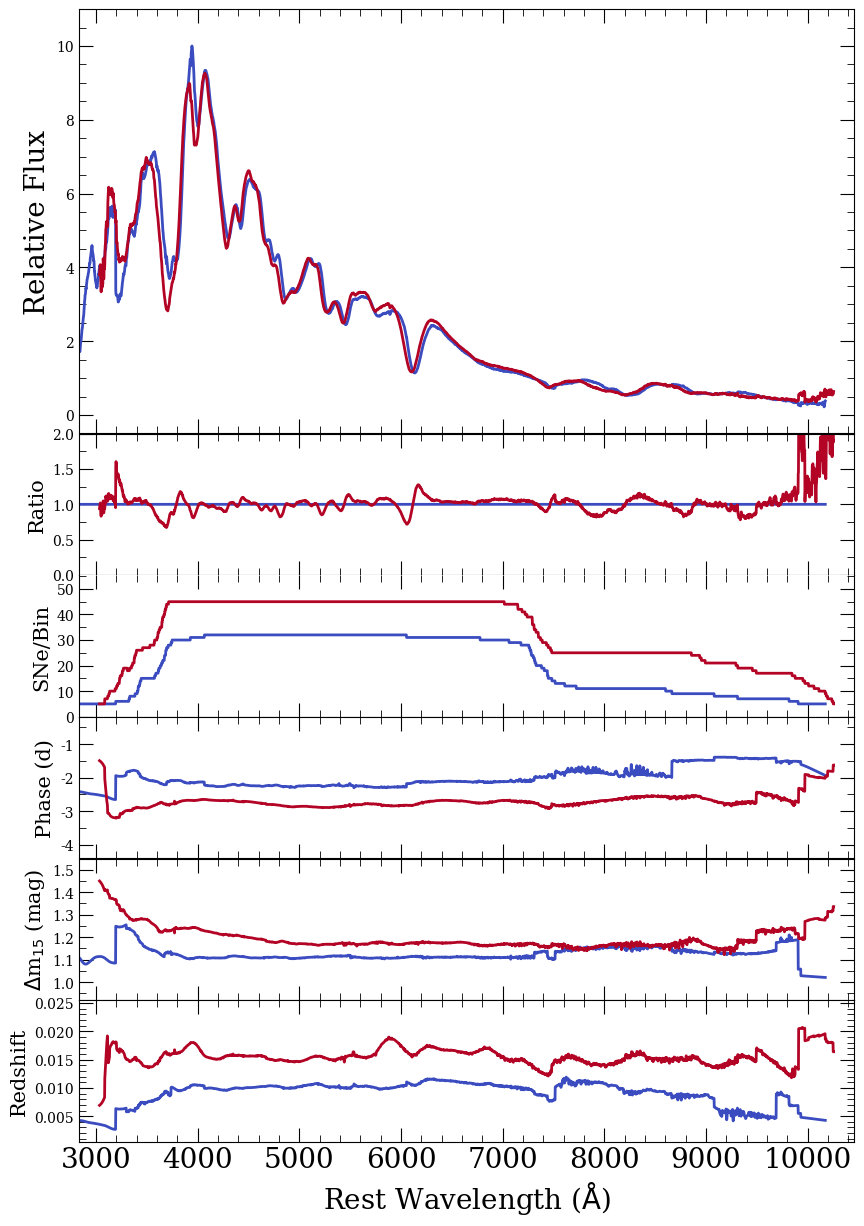

Phase:  0.5381037182673187
dm15:  1.0944148412644248
Redshift:  0.01068389606059881
HR:  0.00853637914036922
Phase:  0.5201821784573907
dm15:  1.2490657692014198
Redshift:  0.017764605833866607
HR:  -0.03609808173129296


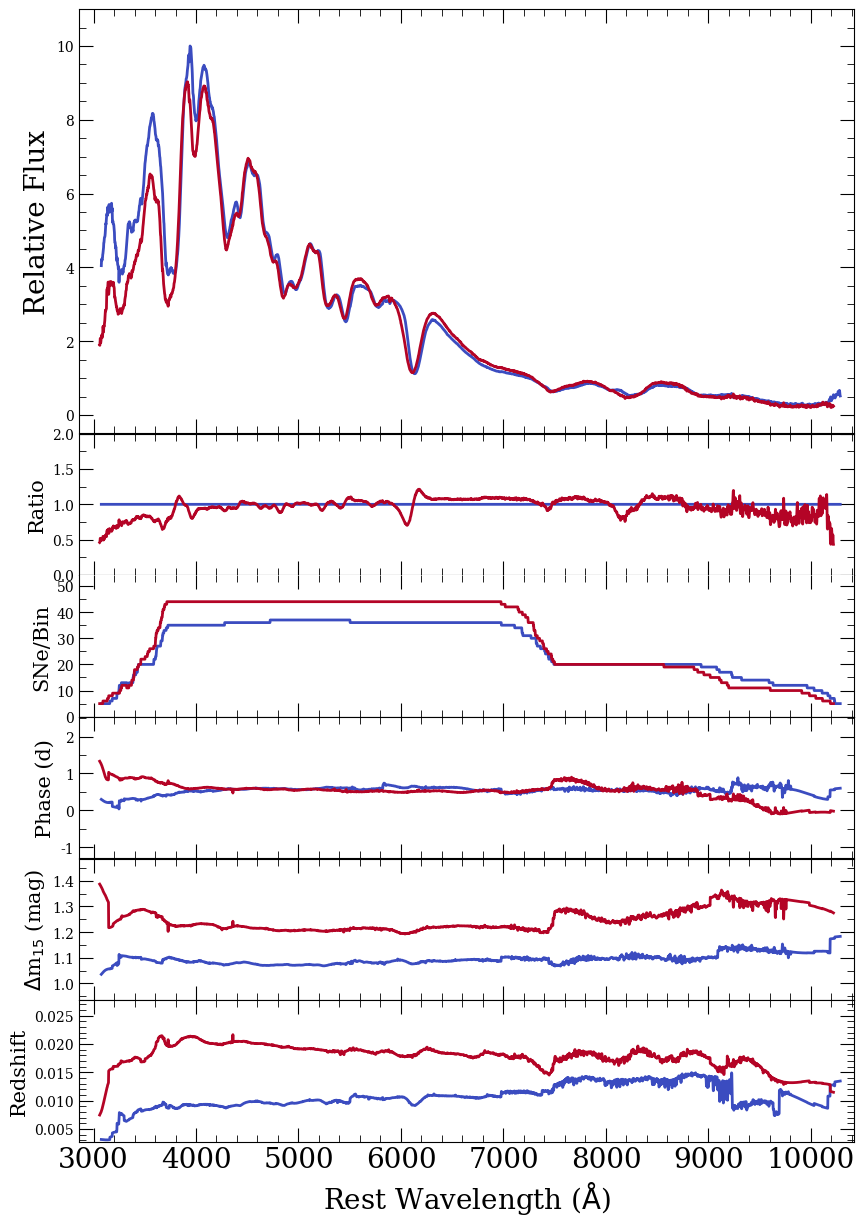

Phase:  3.304524467408875
dm15:  1.1434764803099555
Redshift:  0.012325933636136027
HR:  nan
Phase:  3.535268956213354
dm15:  1.170229826199328
Redshift:  0.015260759823934156
HR:  -0.026300078826632836


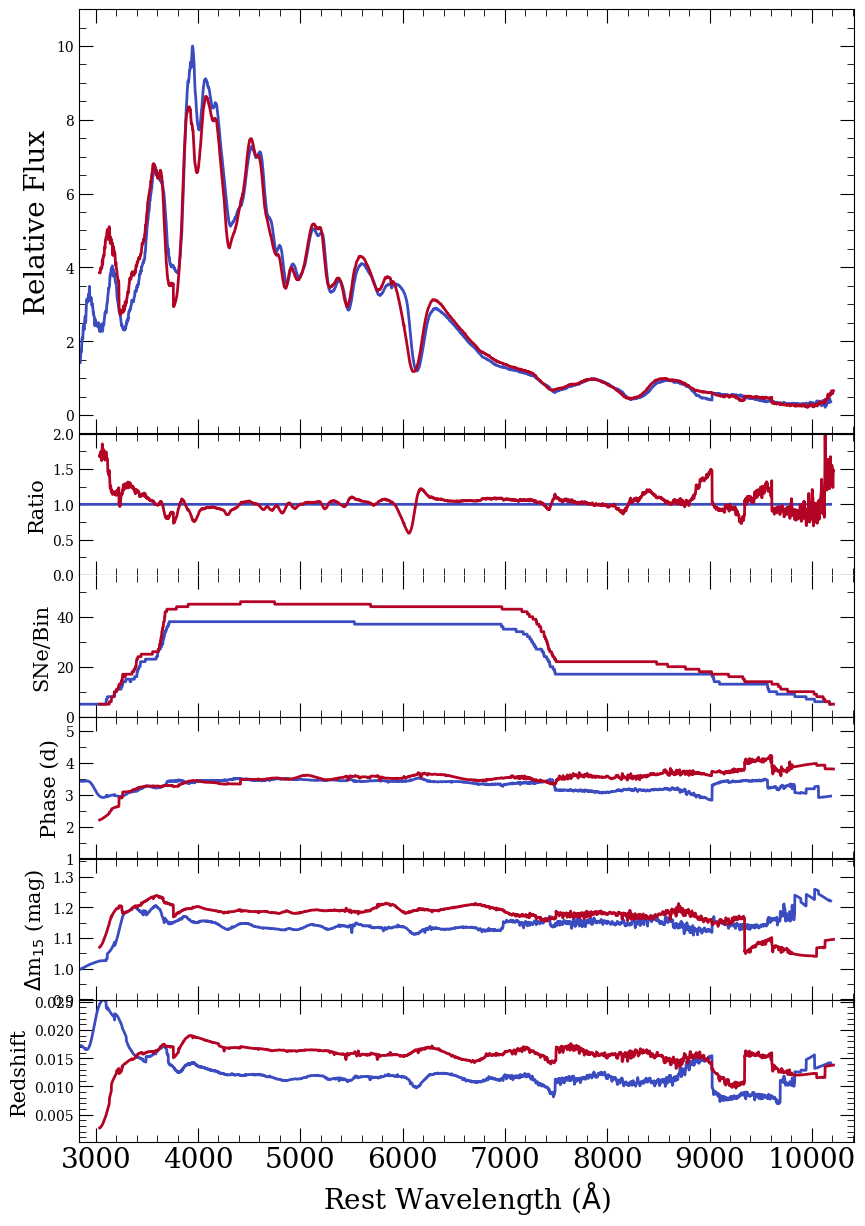

Phase:  6.5511643113453495
dm15:  1.1052540055809148
Redshift:  0.01163943312912104
HR:  0.0369962378071083
Phase:  6.547574233871185
dm15:  1.1860234312545166
Redshift:  0.015829564322482295
HR:  -0.015648352474441848


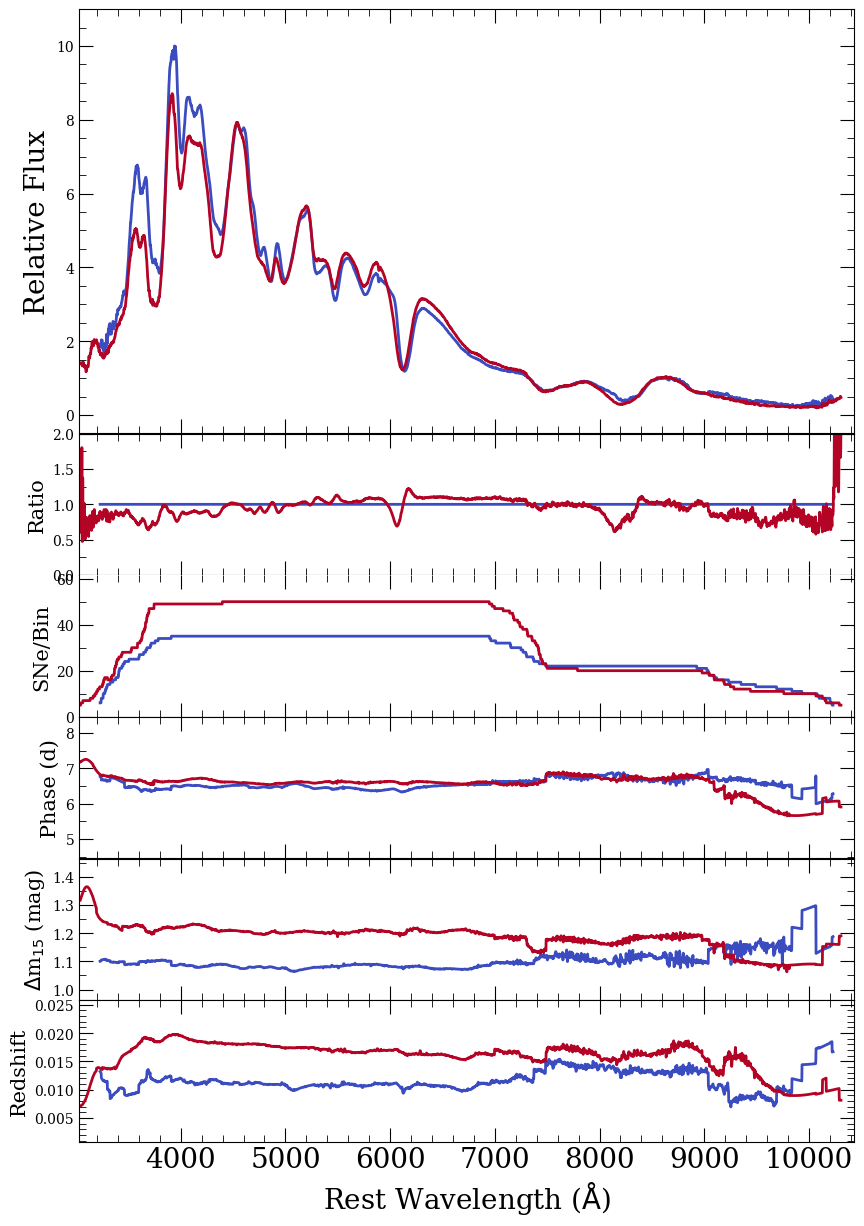

Phase:  9.308408294105229
dm15:  1.0949047835445413
Redshift:  0.009951139742923738
HR:  nan
Phase:  9.351188023978539
dm15:  1.1760640913807787
Redshift:  0.015141061373823586
HR:  -0.04995228231591203


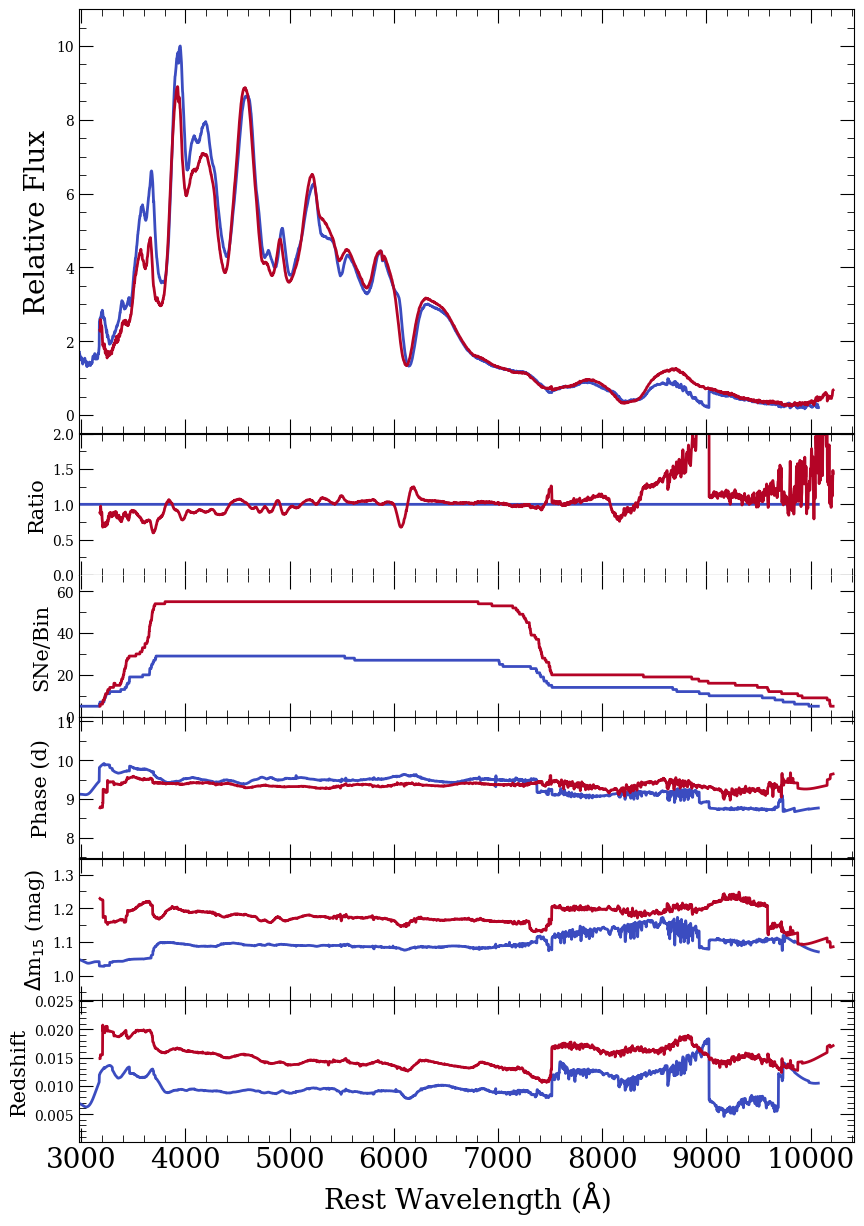

Phase:  12.243406229221792
dm15:  1.1158442416538898
Redshift:  0.009183800543789242
HR:  0.042790250923571665
Phase:  12.586371935984344
dm15:  1.1332019475393083
Redshift:  0.014573489149230965
HR:  0.004085755090139864


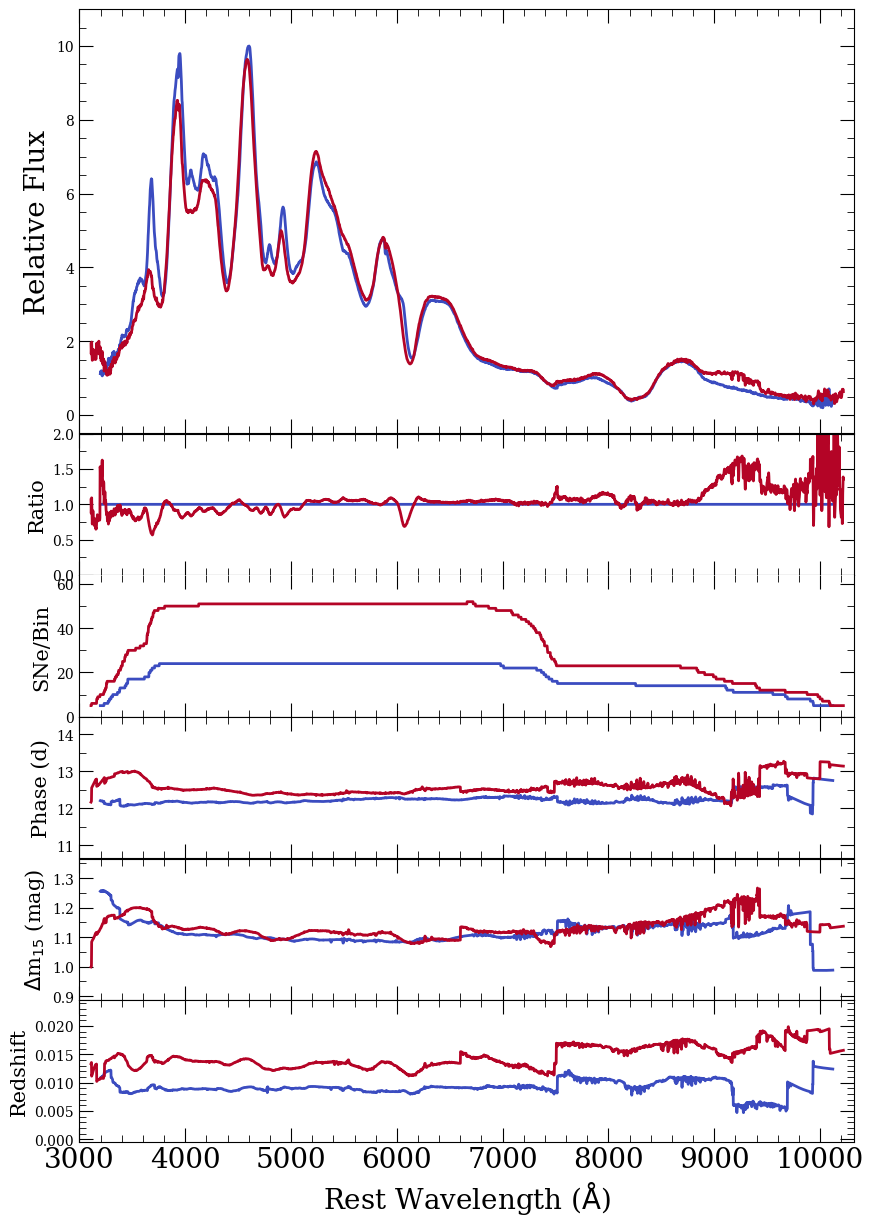

Phase:  15.492393167450603
dm15:  1.1592865173684757
Redshift:  0.012305652605911157
HR:  -0.1131051370856899
Phase:  15.224498424541302
dm15:  1.152633141325905
Redshift:  0.011226585608839164
HR:  -0.020077011627321412


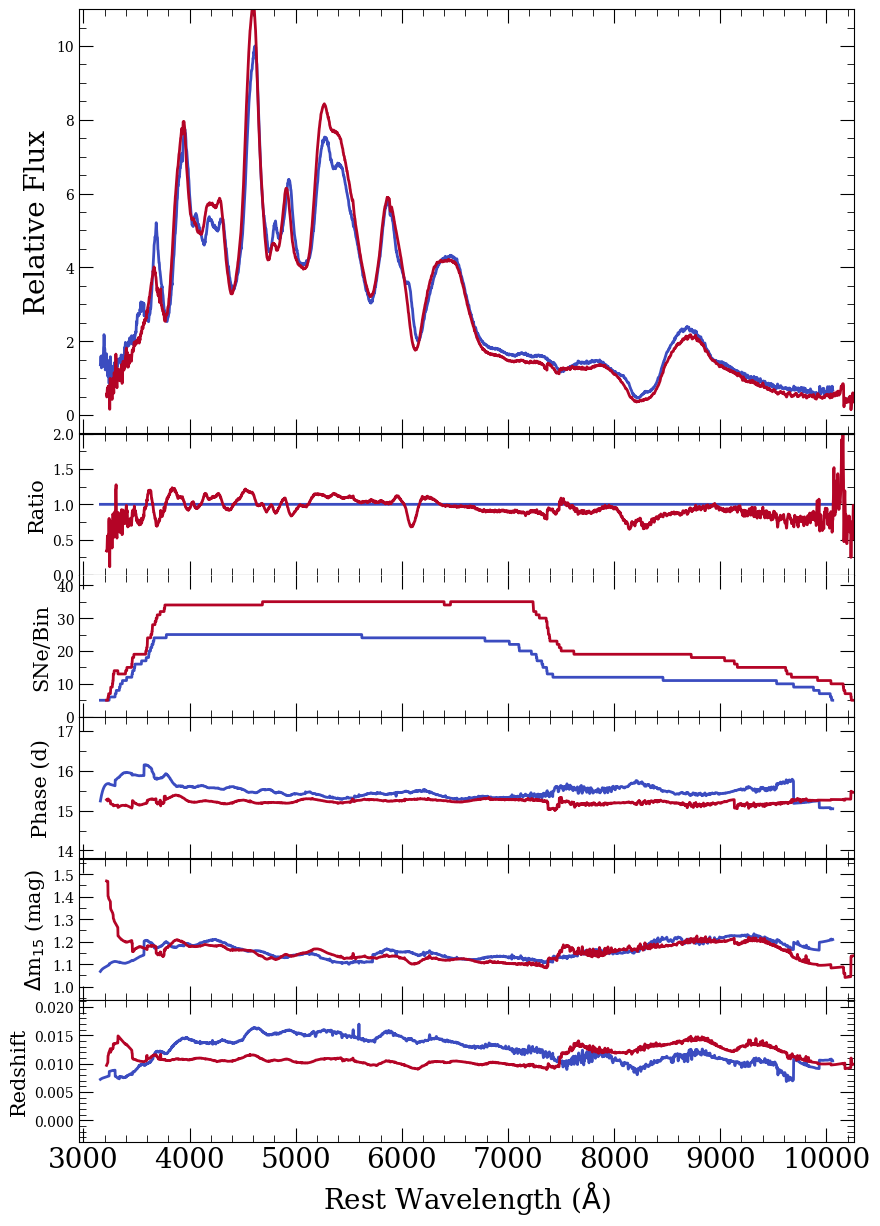

Phase:  18.418847987817287
dm15:  1.0704129674016993
Redshift:  0.014053531178597726
HR:  -0.07633643492391269
Phase:  18.574523010521176
dm15:  1.1198178194356492
Redshift:  0.01414144304287063
HR:  0.017173850791428535


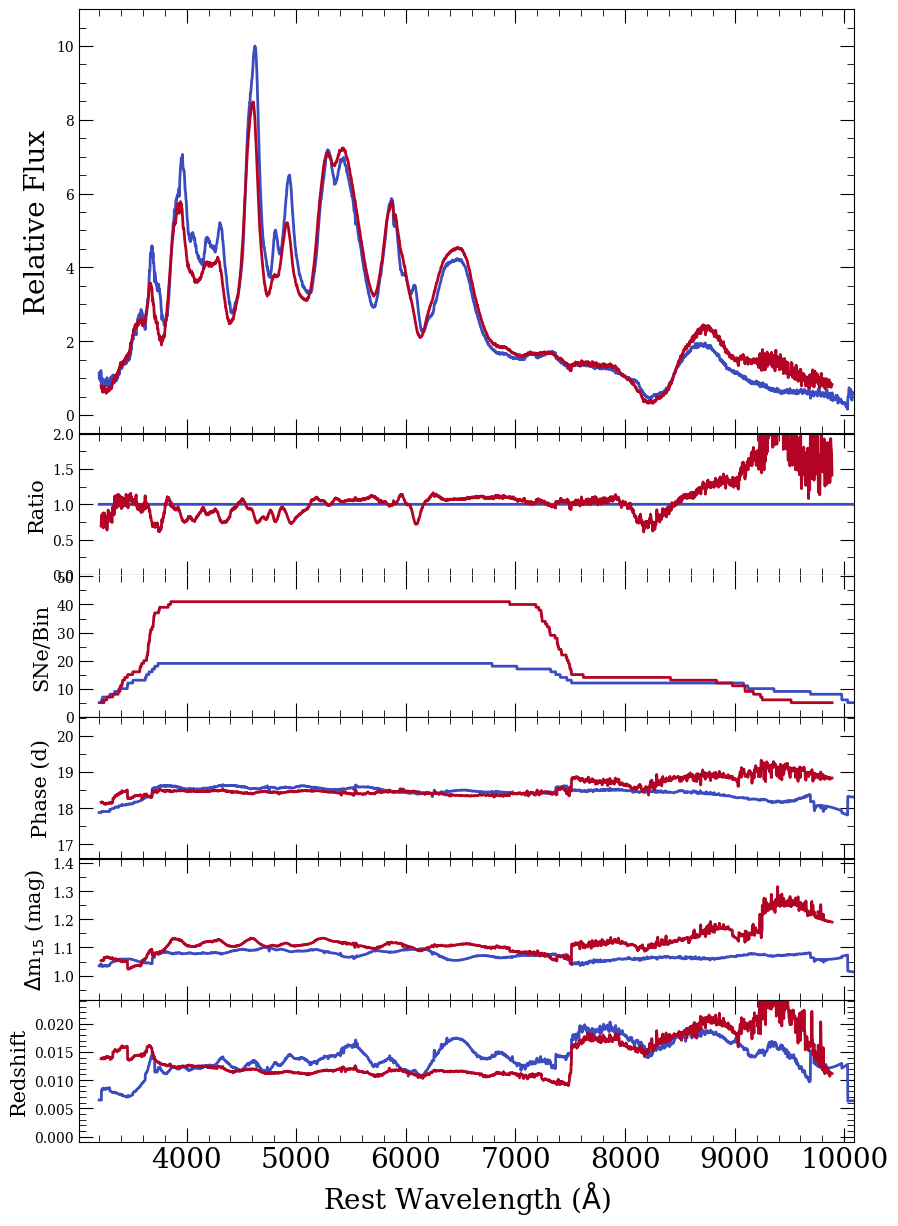

Phase:  21.144305039931986
dm15:  1.0986270144826031
Redshift:  0.01204421214562121
HR:  -0.12991789744495622
Phase:  21.117965606437618
dm15:  1.1913134740118092
Redshift:  0.013200861428215355
HR:  0.07606909380988579


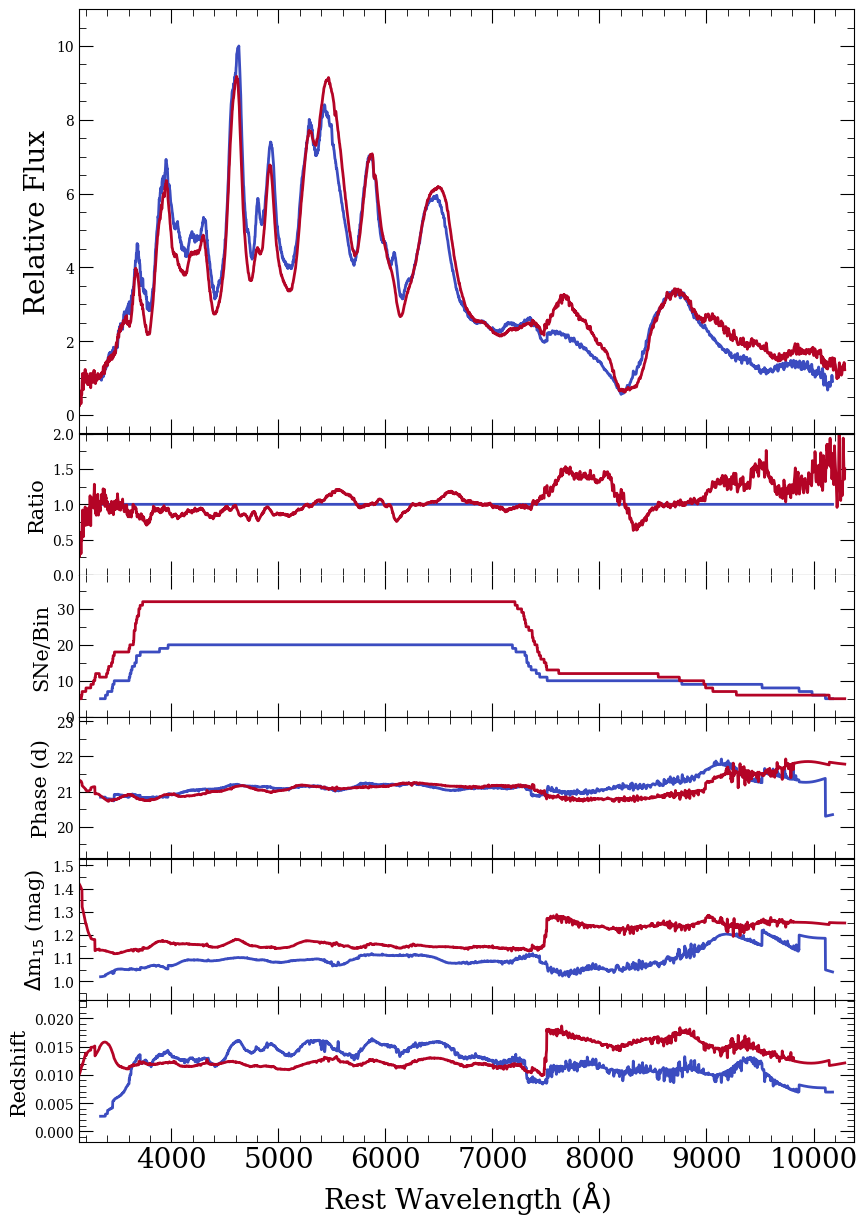

Phase:  24.422133095494246
dm15:  1.1262734953765456
Redshift:  0.01325803172928519
HR:  -0.04625656795260781
Phase:  24.659320988037067
dm15:  1.188761813302377
Redshift:  0.01971418383169788
HR:  nan


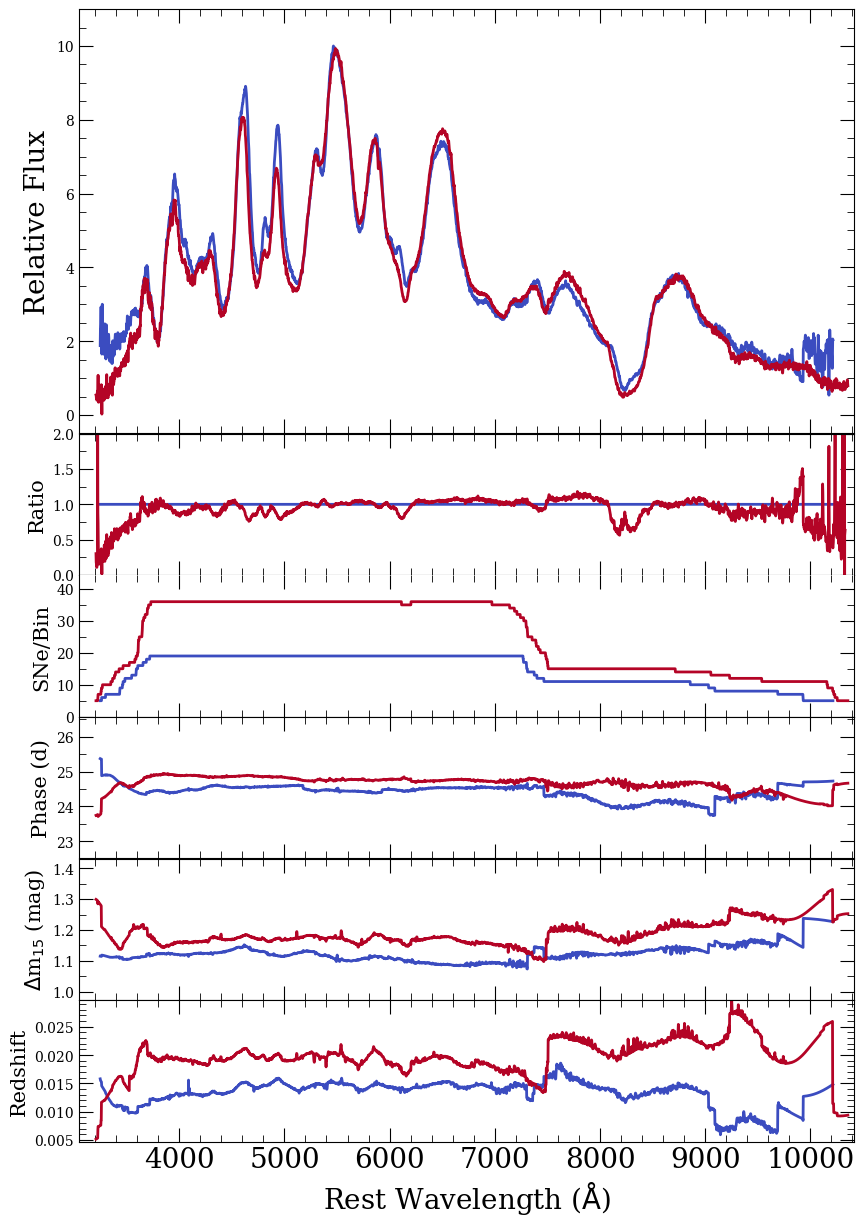

Phase:  27.428047680289264
dm15:  1.137148796172546
Redshift:  0.012167662946521935
HR:  -0.0685585897188471
Phase:  27.57372152151939
dm15:  1.1742621851542134
Redshift:  0.013735480639822386
HR:  -0.09881377718028199


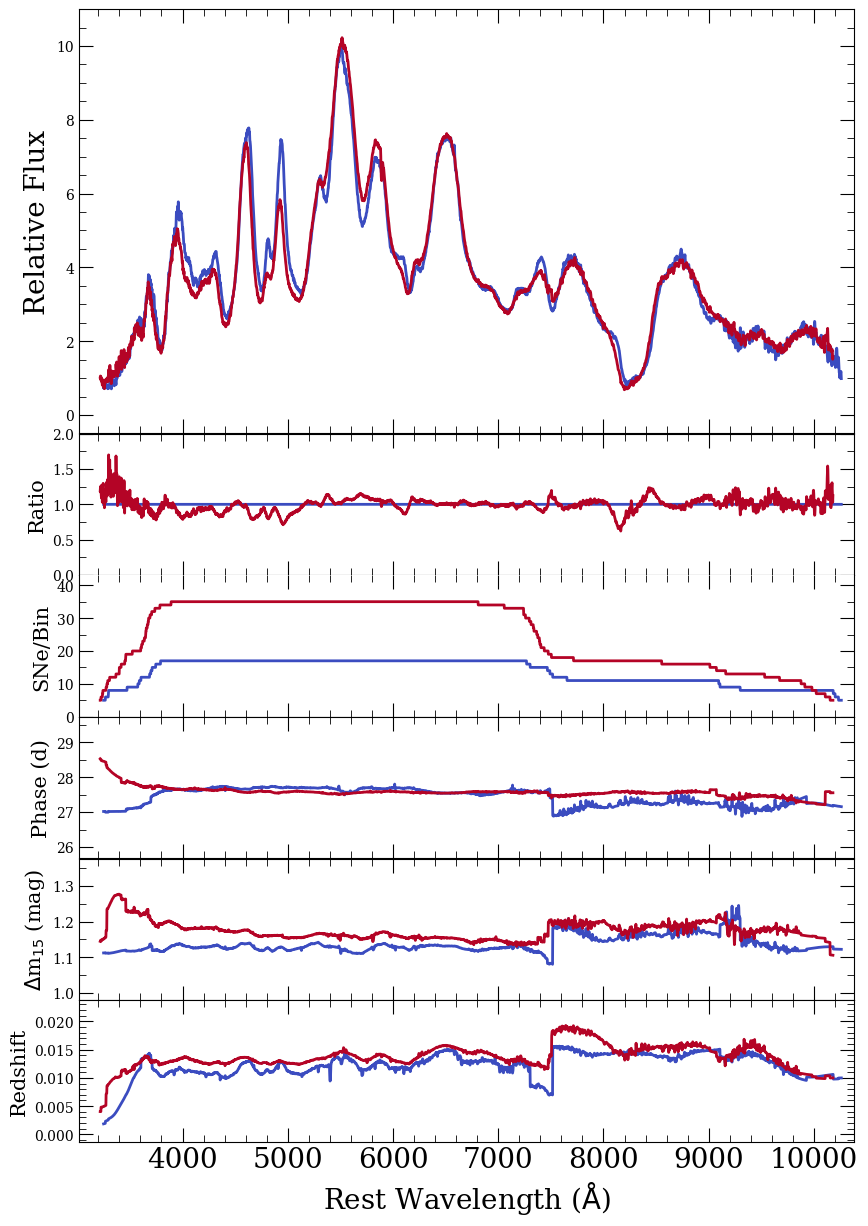

Phase:  30.671081788759523
dm15:  1.1079632888922246
Redshift:  0.015465377717033168
HR:  -0.030901746032007314
Phase:  30.319864649873484
dm15:  1.2379005735966422
Redshift:  0.016781615538573914
HR:  -0.04405916015873346


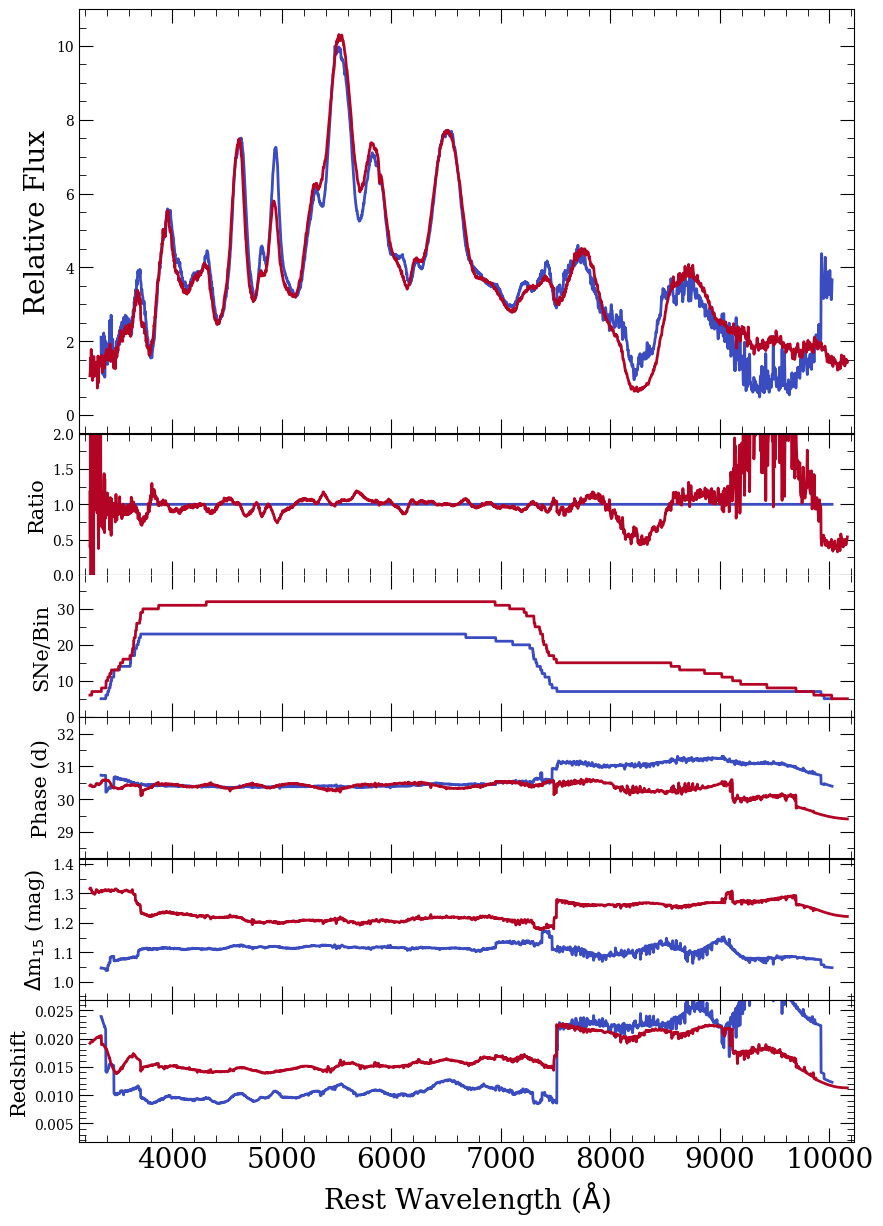

Phase:  33.47522608176488
dm15:  1.0759747094067618
Redshift:  0.008916204068955783
HR:  0.0159806802383559
Phase:  33.44417050620595
dm15:  1.1792025927372625
Redshift:  0.015698744490610466
HR:  0.014204214534708921


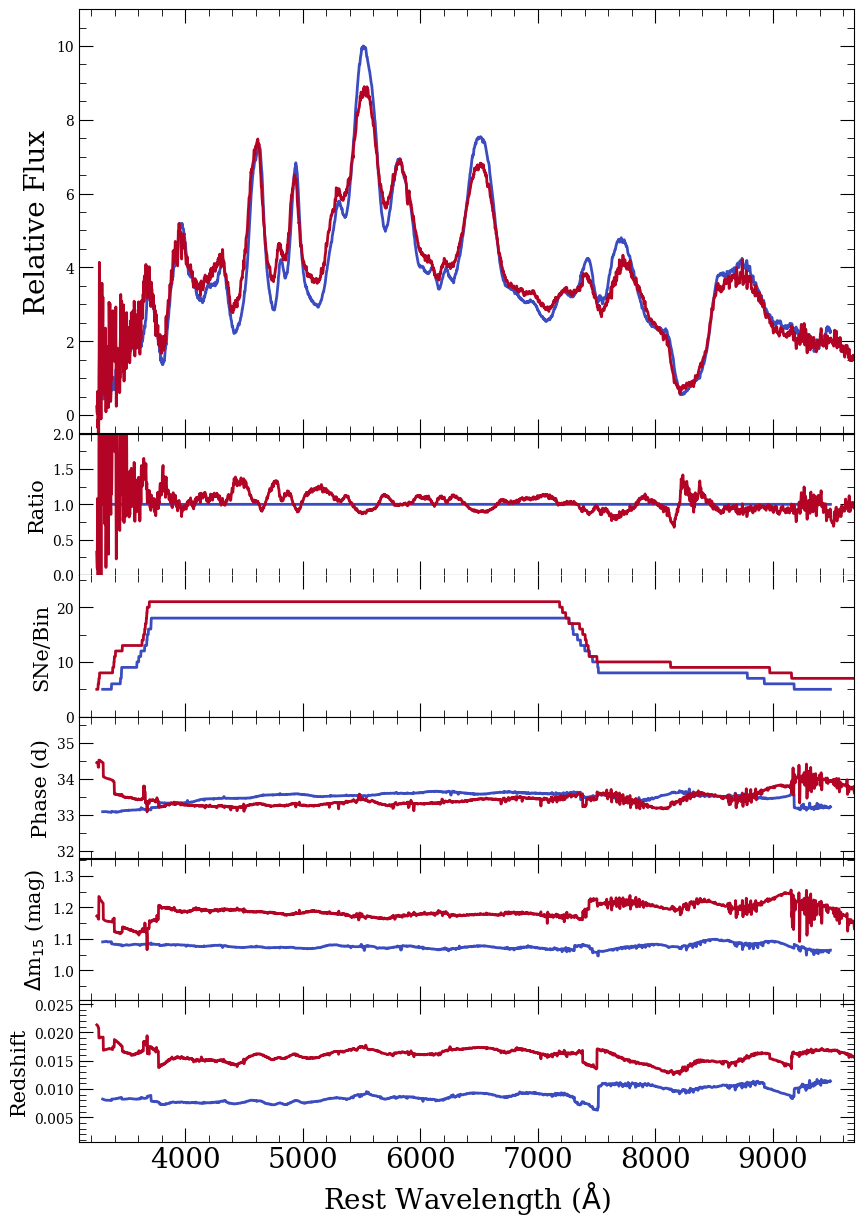

Phase:  36.343361007419375
dm15:  1.118627908115691
Redshift:  0.009101557568390423
HR:  -0.04629021333207619
Phase:  36.41813028237809
dm15:  1.203754352938238
Redshift:  0.01656902221024743
HR:  -0.02430680151900258


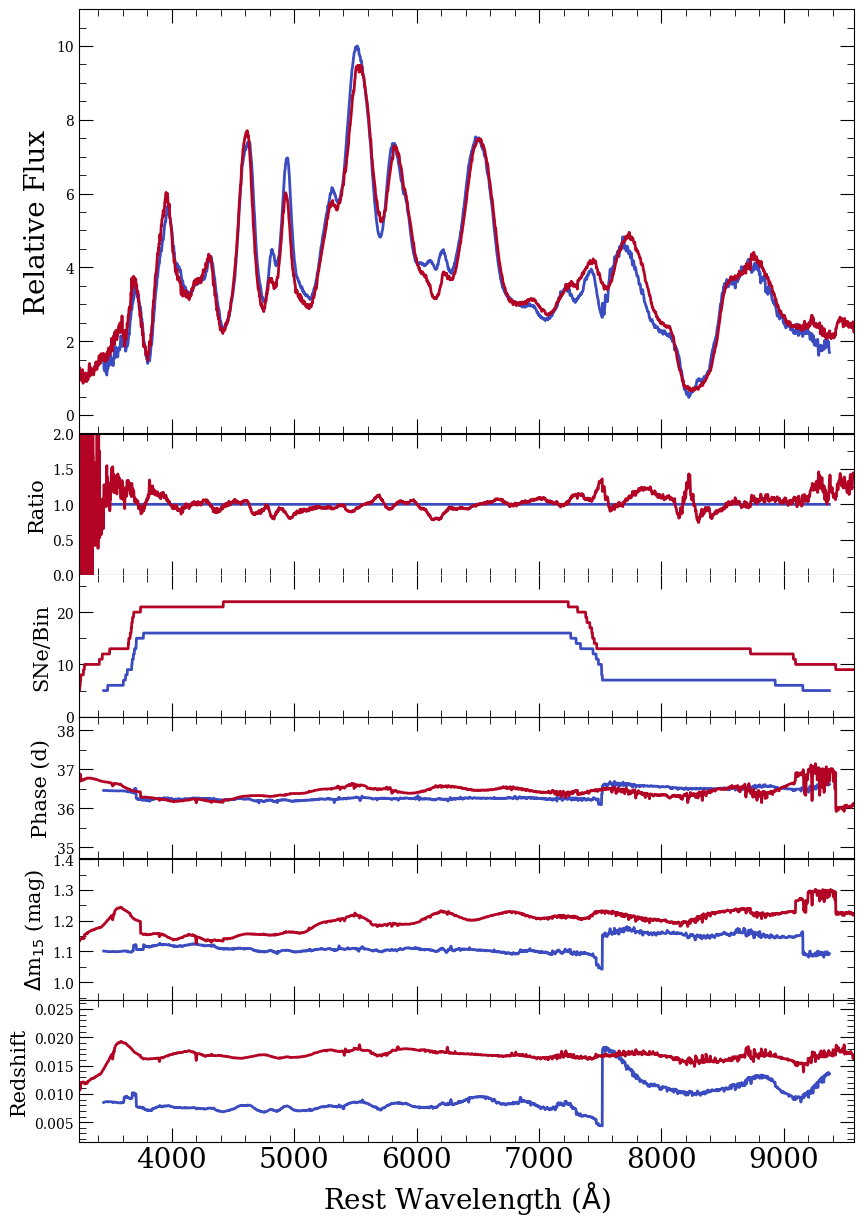

Phase:  39.37202589513169
dm15:  1.0687473465226447
Redshift:  0.005830172070769455
HR:  nan
Phase:  39.49762293536356
dm15:  1.1339861497176813
Redshift:  0.010373389773010465
HR:  -0.009592237028977055


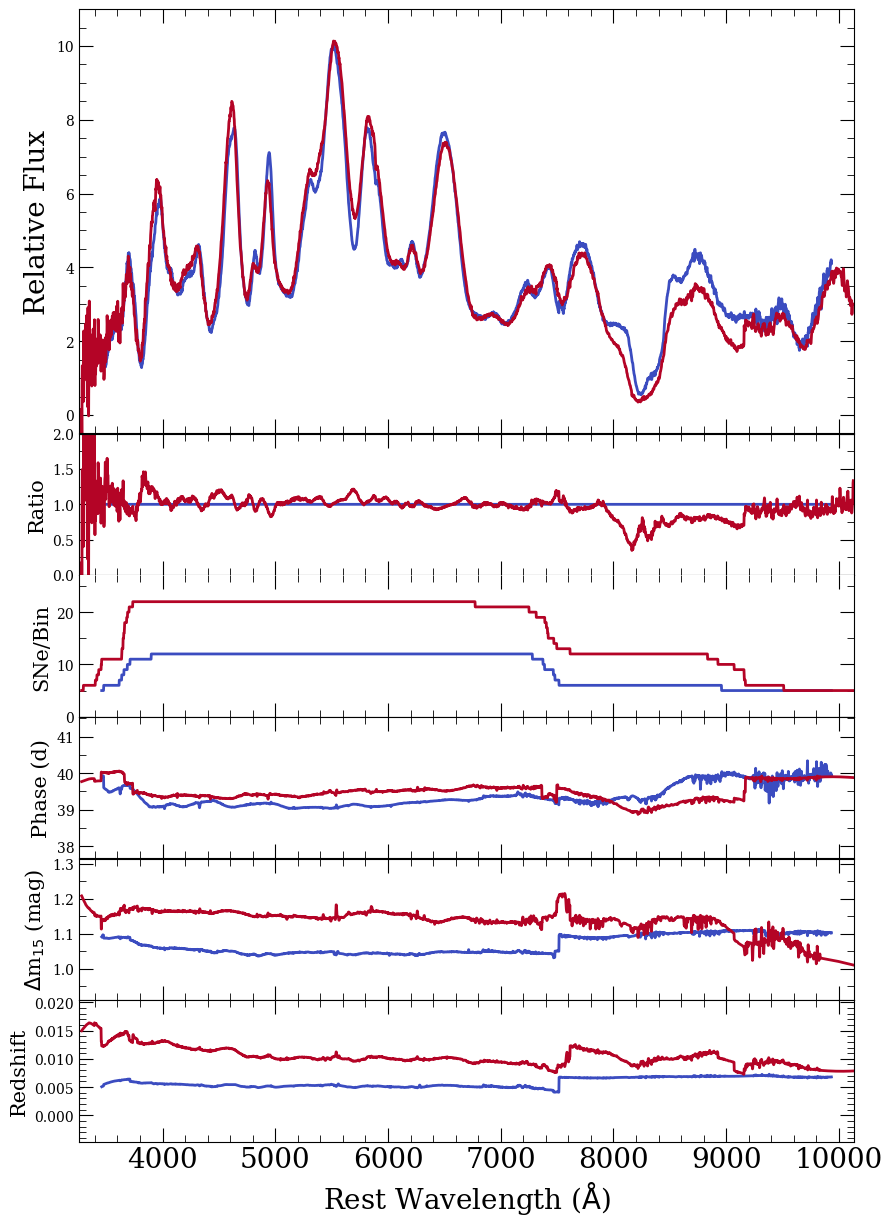

Phase:  42.38571776786197
dm15:  1.0861988018548376
Redshift:  0.006788511127263805
HR:  -0.1115516745767368
Phase:  42.98006541095492
dm15:  1.1584163016275826
Redshift:  0.010997286614415082
HR:  nan


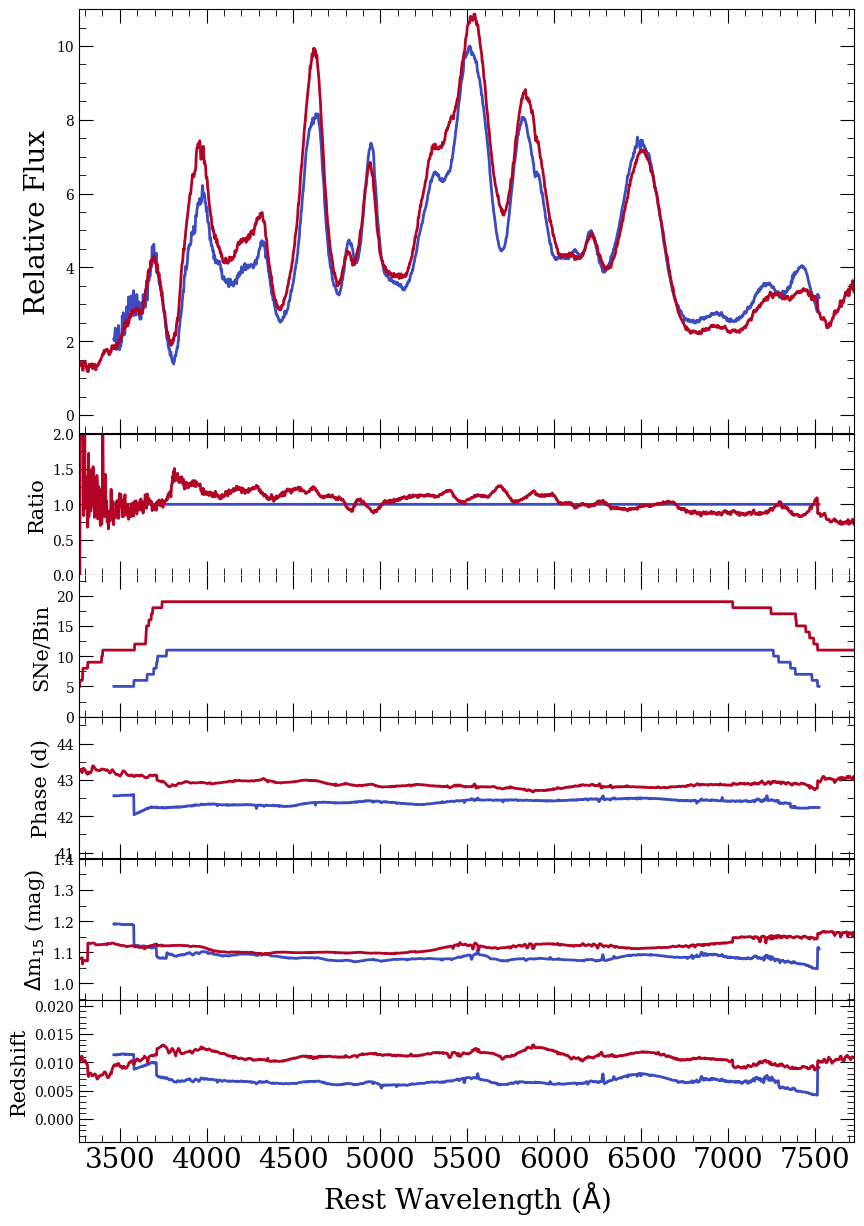

Phase:  44.92206723003086
dm15:  1.1745877595673766
Redshift:  0.010687759195322468
HR:  -0.17343175400265226
Phase:  45.23827155283151
dm15:  1.1349944594938757
Redshift:  0.01009068571098918
HR:  0.054881503005012926


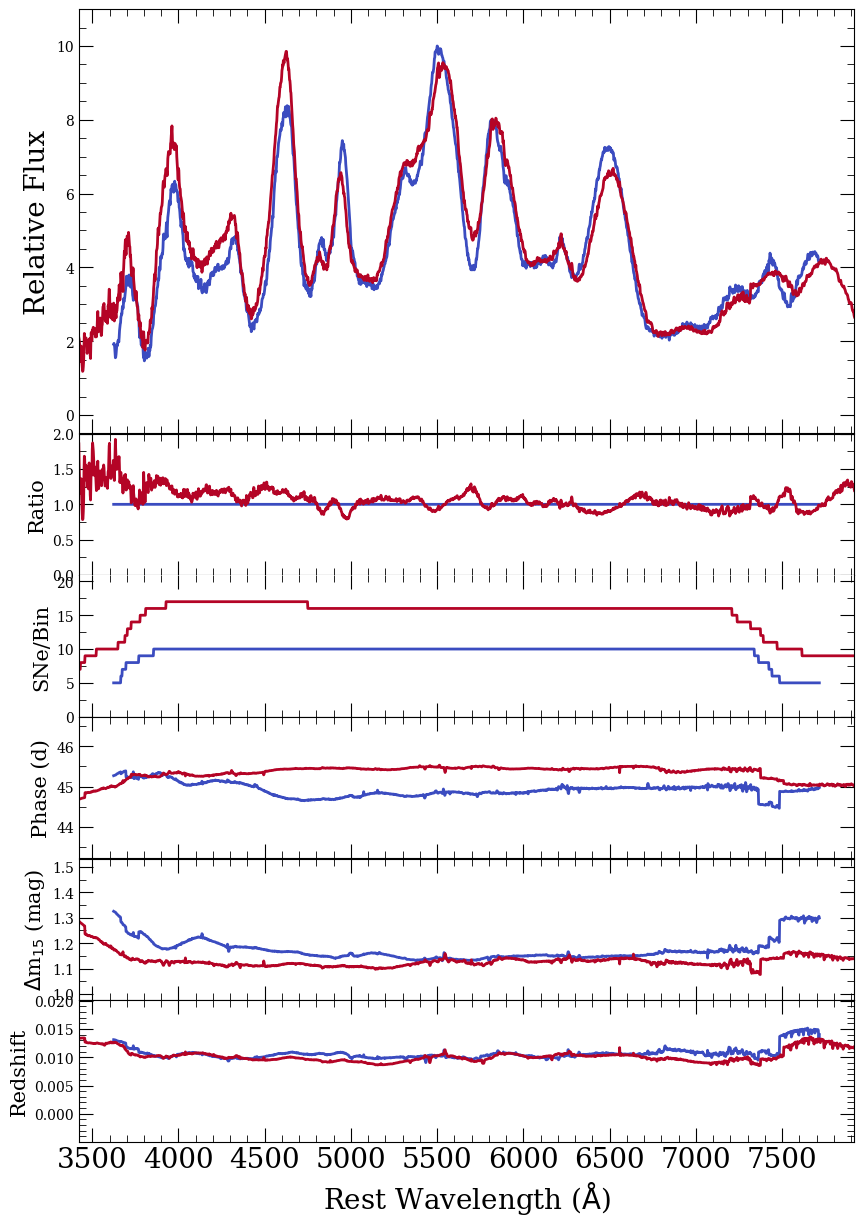

In [25]:
for i in range(len(composites_lowv)-1):
    comp_list = [composites_lowv[i], composites_highv[i]]
    kpora.set_min_num_spec(comp_list, 5)
    kplot.comparison_plot(comp_list, scale_type=False, min_num_show=5)

In [81]:
phases_lowv_1, comp_lowv_B_1, comp_lowv_V_1, errors_lowv_1 = sa.measure_comp_1m2(composites_lowv[0:-1], boot_arrs = boot_sn_arrays_lowv[0:-1], error=True)
phases_highv_1, comp_highv_B_1, comp_highv_V_1, errors_highv_1 = sa.measure_comp_1m2(composites_highv[0:-1], boot_arrs = boot_sn_arrays_highv[0:-1], error=True)


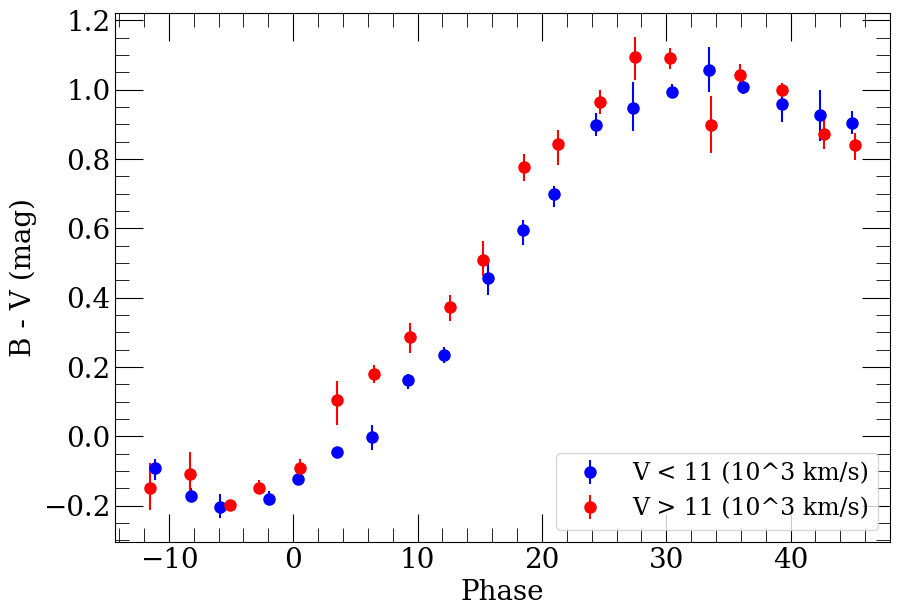

In [82]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
plt.errorbar(phases_lowv_1, np.asarray(comp_lowv_B_1)-np.asarray(comp_lowv_V_1), yerr=errors_lowv_1,fmt='o', markersize=8, color = 'blue', label='V < 11 (10^3 km/s)')
plt.errorbar(phases_highv_1, np.asarray(comp_highv_B_1)-np.asarray(comp_highv_V_1), yerr=errors_highv_1, fmt='o', markersize=8, color = 'red', label='V > 11 (10^3 km/s)')
plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [70]:
phases_lowv, comp_lowv_V, comp_lowv_i, errors_lowv = sa.measure_comp_1m2(composites_lowv[0:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_lowv[0:-1], error=True)
phases_highv, comp_highv_V, comp_highv_i, errors_highv = sa.measure_comp_1m2(composites_highv[0:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_highv[0:-1], error=True)


In [80]:
# for sn in sn_arrays_lowv[4]:
#     print sn.name, sn.v_at_max
# print 
# for sn in sn_arrays_highv[4]:
#     print sn.name, sn.v_at_max

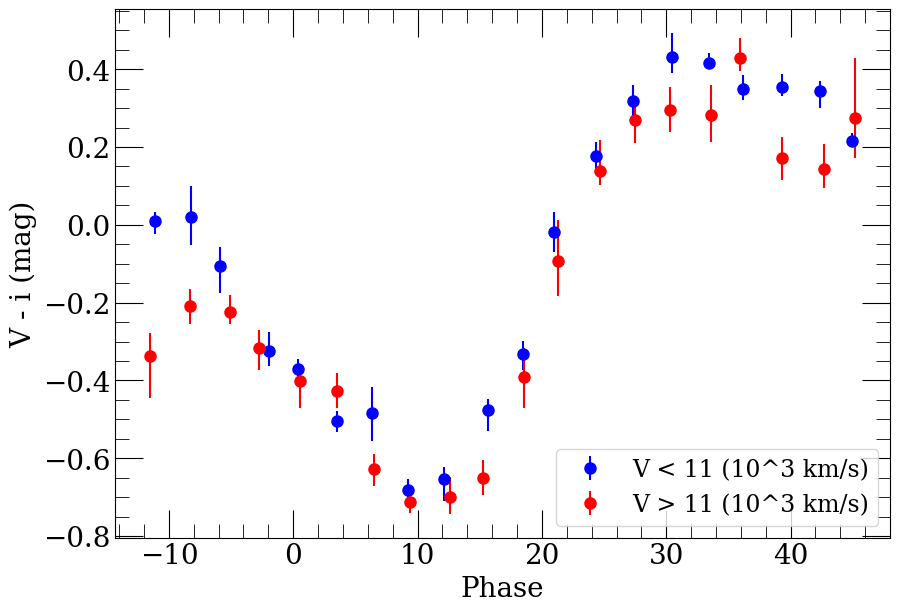

In [74]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('V - i (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
plt.errorbar(phases_lowv, np.asarray(comp_lowv_V)-np.asarray(comp_lowv_i), yerr=errors_lowv,fmt='o', markersize=8, color = 'blue', label='V < 11 (10^3 km/s)')
plt.errorbar(phases_highv, np.asarray(comp_highv_V)-np.asarray(comp_highv_i), yerr=errors_highv, fmt='o', markersize=8, color = 'red', label='V > 11 (10^3 km/s)')
plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [49]:
kpora.save_comps_to_files(composites_lowv[0:-1], 'SALT3_lowv', num_avg = 5, boot=True)
kpora.save_comps_to_files(composites_highv[0:-1], 'SALT3_highv', num_avg = 5, boot=True)

-11.09 1.08 0.006
../../David_Comps/SALT3_lowv_N=7_Nspec=28_phase=m11.09_dm15=1.08_z=0.006.txt
-8.18 1.1 0.005
../../David_Comps/SALT3_lowv_N=9_Nspec=24_phase=m8.18_dm15=1.1_z=0.005.txt
-5.86 1.14 0.012
../../David_Comps/SALT3_lowv_N=14_Nspec=33_phase=m5.86_dm15=1.14_z=0.012.txt
-1.94 1.11 0.008
../../David_Comps/SALT3_lowv_N=19_Nspec=43_phase=m1.94_dm15=1.11_z=0.008.txt
0.35 1.12 0.009
../../David_Comps/SALT3_lowv_N=22_Nspec=45_phase=p0.35_dm15=1.12_z=0.009.txt
3.52 1.1 0.01
../../David_Comps/SALT3_lowv_N=23_Nspec=56_phase=p3.52_dm15=1.1_z=0.01.txt
6.35 1.1 0.011
../../David_Comps/SALT3_lowv_N=23_Nspec=37_phase=p6.35_dm15=1.1_z=0.011.txt
9.2 1.12 0.01
../../David_Comps/SALT3_lowv_N=20_Nspec=30_phase=p9.2_dm15=1.12_z=0.01.txt
12.15 1.11 0.008
../../David_Comps/SALT3_lowv_N=16_Nspec=29_phase=p12.15_dm15=1.11_z=0.008.txt
15.63 1.11 0.012
../../David_Comps/SALT3_lowv_N=17_Nspec=26_phase=p15.63_dm15=1.11_z=0.012.txt
18.49 1.09 0.011
../../David_Comps/SALT3_lowv_N=14_Nspec=26_phase=p18.49_d

In [33]:
v_query = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -1 and 1 and v_at_max > -40"
# v_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 2 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.3)) and v_at_max > -11"]

In [40]:
spec_array = kpora.grab(v_query, multi_epoch=False, verbose=True)


166 Total Spectra found
109 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1991bg sn1991bg-19911213-noz.flm bsnip 190.936993215 0.681687715271 48603.0 48602.316 0.003392 3.0 3342.0 8600.0
1994s sn1994s-19940616-uoi.flm bsnip 56.524322367 0.998840596273 49519.338 49518.324 0.015177 11.0 3126.0 11080.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 173.128497131 0.496750833938 51142.252 51141.75 0.010567 8.0 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 87.383415757 0.460351148368 51232.237 51231.77 0.014443 14.0 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip 184.483349779 -0.385339276873 51249.466 51249.855 0.0095 15.0 3298.0 10350.0
2000dn sn2000dn-20001006-uri-corrected.flm bsnip 31.1030531774 -0.845876955424 51823.327 51824.2 0.032065 8.0 3250.0 10026.0
2001cp sn2001cp-20010629-ui.flm bsnip 39.9997914207 0.917447344588 52089.422 52088.484 0.022402 13.0 3280.0 10122

1991bg -10.0393
1994s -10.7153
1998es -10.1984
1999aa -10.4412
1999ac -9.93407
2000dn -10.2088
2001cp -10.8796
2002cf -11.3549
2002de -11.4394
2002ha -11.2873
2002he -12.6181
2005ag -11.7513
2005eq -9.88943
2005lz -10.3582
2005na -10.7377
2006ej -11.8895
2006n -11.3228
2007a -10.8853
2007bc -10.4855
2007co -12.0247
2007hj -12.1791
2007o -9.95628
1994ae -10.9786
1994d -11.2373
1994t -13.4325
1995e -11.1568
1996x -11.1731
1997bp -15.6234
1997dt -11.33
1998aq -10.801
1998bp -11.0104
1998bu -10.9055
1998de -11.3029
1998dh -12.037
1998dx -11.8033
1998v -10.851
1999cc -12.0297
1999cl -12.4726
1999ej -10.6638
1999gp -11.3346
2000cp -11.7279
2000dg -10.8109
2000dk -11.1015
2001ay -14.7755
2001br -13.45
2001da -11.5274
2001eh -10.7001
2001ep -10.8007
2001fe -11.1475
2002aw -10.8468
2002cd -15.2751
2002ck -10.2898
2002cr -10.0536
2002fb -10.9227
2002hu -9.87507
2002jy -10.947
2003cg -11.3586
2003ch -10.9685
2003cq -11.6706
2003ic -11.9536
2003it -11.7187
2003iv -10.8901
2003kc -12.7437
2003u -11

(array([ 4.,  2.,  0.,  4.,  9., 30., 35., 19.,  5.,  1.]),
 array([-15.9693  , -15.181764, -14.394228, -13.606692, -12.819156,
        -12.03162 , -11.244084, -10.456548,  -9.669012,  -8.881476,
         -8.09394 ]),
 <a list of 10 Patch objects>)

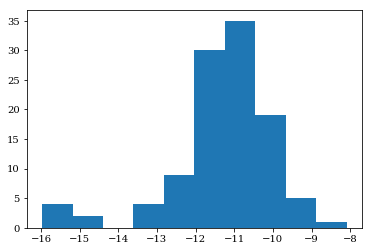

In [79]:
vs = []
for SN in spec_array:
    print SN.name, SN.v_at_max
    vs.append(SN.v_at_max)
plt.hist(vs)

In [31]:
for v in vs:
    print v

-10.5605
-9.37694
-11.9877
-10.0393
-12.8053
-9.62359
-13.2083
-10.9786
-11.2373
-10.7153
-13.0077
-10.3288
-11.1568
-10.8161
-15.6234
-11.5998
-9.60758
-13.3799
-12.01
-11.033
-10.801
-11.0104
-10.9055
-11.3029
-12.037
-11.0696
-11.8033
-12.4132
-13.262
-10.8113
-10.1984
-10.851
-10.4412
-9.93407
-10.1003
-12.4726
-11.146
-10.8317
-10.715
-10.0121
-10.754
-10.7787
-12.021
-11.3653
-12.2339
-11.7279
-11.5773
-10.5616
-10.8109
-11.1015
-11.2743
-10.2088
-11.8174
-14.7755
-11.4551
-10.6327
-10.5271
-12.5208
-13.45
-10.3669
-11.2673
-10.8796
-11.5274
-9.93402
-14.5113
-10.7001
-13.3187
-10.8007
-9.88352
-11.1475
-10.9183
-11.8452
-15.0052
-14.0566
-11.2021
-10.8468
-15.5161
-13.1142
-15.2751
-11.3549
-10.2898
-10.0536
-14.033
-12.5034
-11.4394
-13.6864
-11.2857
-11.0855
-11.5258
-11.911
-11.522
-10.9227
-10.008
-11.8438
-11.2873
-11.3276
-12.6181
-9.87507
-10.6725
-11.5452
-10.947
-11.9148
-11.6706
-10.5133
-10.1848
-12.5156
-10.6755
-10.7918
-10.8901
-12.7437
-11.2646
-11.3124
-14.6847
-

In [99]:
# late_color_check = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and v_at_max > -12",
#                     "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and v_at_max < -12"]
# # late_color_check = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=63 and phase <80 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 > -12000",
# #                     "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=60 and phase <80 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 < -12000"]
# composites_check, sn_arrays_check, boot_sn_arrays_check = kpora.make_composite(late_color_check, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)

In [100]:
# comp_list = [composites_check[0], composites_check[1]]
# kpora.set_min_num_spec(comp_list, 5)
# kplot.comparison_plot(comp_list, scale_type=False, min_num_show=5)

In [93]:
late_color_check_kyle = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 > -12000",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 between -30000 and -12000"]

In [94]:
composites_check_kyle, sn_arrays_check_kyle, boot_sn_arrays_check_kyle = kpora.make_composite(late_color_check_kyle, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 > -12000
57 Total Spectra found
1 flagged spectra removed 56 spectra left
0 spectra of peculiar Ias removed 56 spectra left
56 spectra of SNe that have host reddening corrections
Arrays cleaned
56 spectra may have telluric contamination
24 total SNe
removed spectra of SNe with A_V > 2.0
Using 55 spectra of 22 SNe
Gini balancing...
Balanced after 14 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 between -30000 and -12000
39 Total Spectra found
0 flagged spectra removed 39 spectra left
0 spectra of peculiar Ias removed 39 spectra left
39 spectra of SNe that have host reddening corrections
Arrays clean

Phase:  59.85173274831258
dm15:  1.1135824977107796
Redshift:  0.008989393874140899
HR:  0.04113671218440473
Phase:  58.647603175259604
dm15:  1.0887061724980982
Redshift:  0.013776274966417935
HR:  -0.11451385319599615


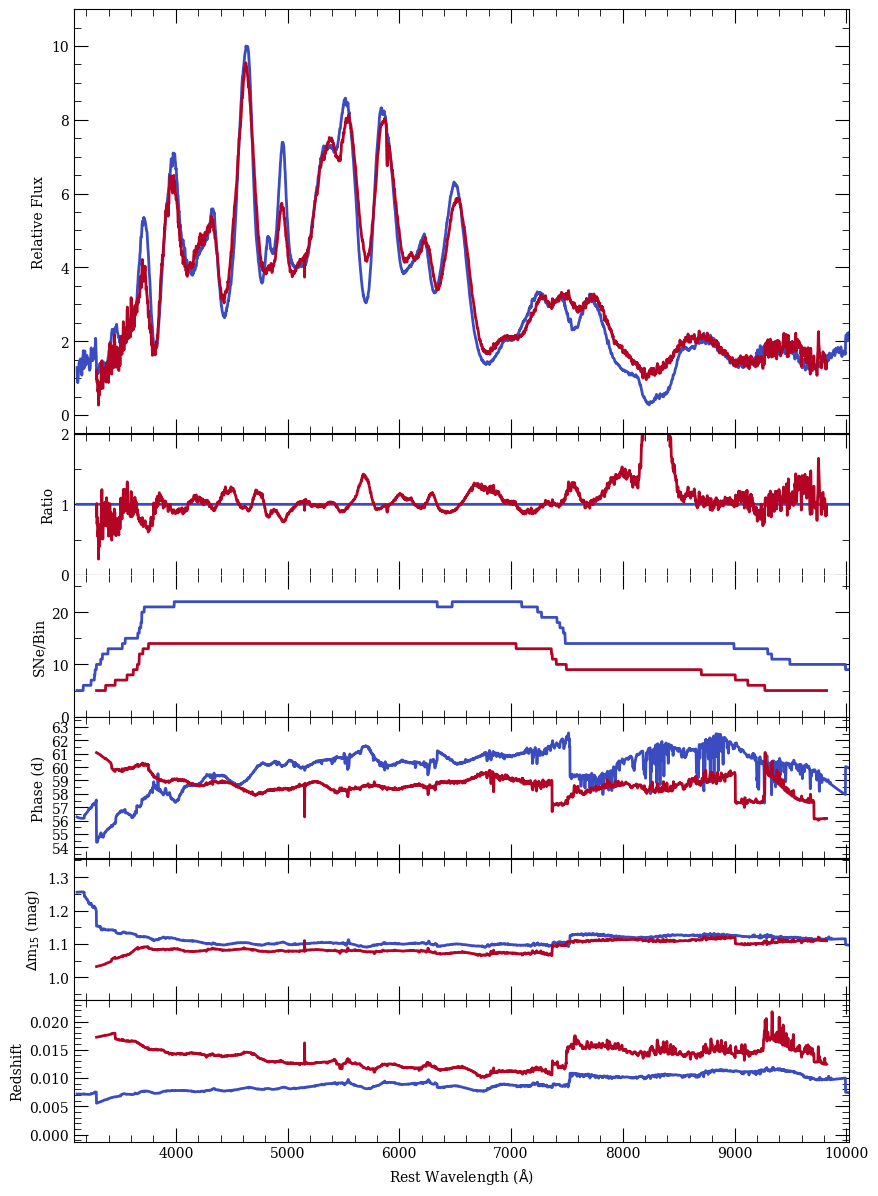

In [95]:
comp_list_kyle = [composites_check_kyle[0], composites_check_kyle[1]]
kpora.set_min_num_spec(comp_list_kyle, 5)
kplot.comparison_plot(comp_list_kyle, scale_type=False, min_num_show=5)

In [101]:
# comp_list_test = [composites_check[1], composites_check_kyle[1]]
# kpora.set_min_num_spec(comp_list_test, 5)
# kplot.comparison_plot(comp_list_test, scale_type=False, min_num_show=5)

In [98]:
for spec in sn_arrays_check[1]:
    print spec.name
print
for spec in sn_arrays_check_kyle[1]:
    print spec.name

2004dt_combined
2002bo_combined
2007co_combined
1997bp_combined
2007le_combined
2003w
2006ef
2002dj

2004dt_combined
2001g_combined
2005na_combined
2002bo_combined
1997bp_combined
2007le_combined
2003w
2006te
1995ak
1998dk
2005al
2006ef
2008c
2002dj
